In [89]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [143]:
shipment = pd.read_feather('late_shipments.feather')

In [144]:
shipment.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [145]:
shipment.shape

(1000, 27)

In [146]:
shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [147]:
shipment.describe(include='all')

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
count,1000.000000,1000,1000,1000,1000,1000,1000.00000,1000,1000,1000,...,1000.000000,1.000000e+03,1000.000000,1000.000000,1000,1000,1000.000000,986.000000,986,966.000000
unique,NaN,31,1,1,5,3,NaN,2,4,6,...,NaN,NaN,NaN,NaN,50,1,NaN,NaN,2,NaN
top,NaN,Vietnam,PMO - US,Direct Drop,EXW,Air,NaN,No,ARV,Adult,...,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,NaN,NaN,expensive,NaN
freq,NaN,158,1000,1000,732,906,NaN,939,583,442,...,NaN,NaN,NaN,NaN,171,1000,NaN,NaN,531,NaN
mean,39239.957000,NaN,NaN,NaN,NaN,NaN,0.06100,NaN,NaN,NaN,...,15923.379000,1.542272e+05,36.570830,1.094050,NaN,NaN,1947.682000,10896.676856,NaN,245.143209
std,24878.296938,NaN,NaN,NaN,NaN,NaN,0.23945,NaN,NaN,NaN,...,37793.936877,2.160517e+05,47.611183,3.356263,NaN,NaN,3125.348148,14267.588869,NaN,357.305275
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,...,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,1.000000,30.000000,NaN,0.000000
25%,17055.000000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,...,600.000000,1.181160e+04,6.497500,0.110000,NaN,NaN,162.750000,1946.497500,NaN,16.845000
50%,38283.500000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,...,2992.000000,6.360000e+04,21.000000,0.380000,NaN,NaN,909.000000,5806.750000,NaN,100.700000
75%,62036.500000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,...,11733.000000,2.178262e+05,70.000000,0.890000,NaN,NaN,2526.000000,14821.792500,NaN,330.000000


In [148]:
shipment[shipment.isna().any(axis=1)]

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
7,2647.0,Cote d'Ivoire,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,100.0,7535.00,75.35,1.88,Bio-Rad Laboratories,Yes,107.0,1845.74,reasonable,NaN
67,1.0,Cote d'Ivoire,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,19.0,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,reasonable,NaN
88,14803.0,Rwanda,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Pediatric,...,9720.0,14677.20,1.51,0.01,"Aurobindo Unit III, India",Yes,4365.0,NaN,None,15.09
100,45.0,Tanzania,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,16667.0,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478.0,6212.41,expensive,NaN
123,60.0,Zambia,PMO - US,Direct Drop,CIP,Air,0.0,No,ARV,Adult,...,2800.0,115080.00,41.10,0.34,ABBVIE Ludwigshafen Germany,Yes,643.0,NaN,None,NaN
146,4.0,Cote d'Ivoire,PMO - US,Direct Drop,FCA,Air,0.0,No,HRDT,HIV test,...,500.0,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,reasonable,NaN
151,1283.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,95500.0,144205.00,1.51,0.03,"Strides, Bangalore, India.",Yes,9170.0,42453.21,expensive,NaN
155,56057.0,Nigeria,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,6388.0,568532.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,2590.0,NaN,None,669.16
220,5364.0,Cote d'Ivoire,PMO - US,Direct Drop,CIP,Air,0.0,No,ARV,Pediatric,...,1577.0,14981.50,9.50,0.16,"BMS Meymac, France",Yes,309.0,NaN,None,23.97
235,3956.0,Vietnam,PMO - US,Direct Drop,FCA,Air,0.0,No,ARV,Adult,...,200.0,32688.00,163.44,0.61,Roche Madrid,Yes,54.0,13981.96,expensive,NaN


In [149]:
objectcol = shipment.select_dtypes('object').columns

In [150]:
for col in objectcol:
    print(col, shipment[col].unique())
# take a look for the unique values in object cols

country ['Nigeria' 'Botswana' 'Vietnam' 'South Africa' 'Uganda' 'Ethiopia' 'Sudan'
 "Cote d'Ivoire" 'Malawi' 'Zambia' 'Mozambique' 'Tanzania' 'Ghana'
 'Namibia' 'Rwanda' 'Cameroon' 'Haiti' 'South Sudan' 'Kenya' 'Guyana'
 'Senegal' 'Zimbabwe' 'Guatemala' 'Burundi' 'Congo, DRC' 'Angola'
 'Dominican Republic' 'Liberia' 'Pakistan' 'Swaziland' 'Mali']
managed_by ['PMO - US']
fulfill_via ['Direct Drop']
vendor_inco_term ['EXW' 'DDP' 'CIP' 'FCA' 'DDU']
shipment_mode ['Air' 'Ocean' 'Air Charter']
late ['Yes' 'No']
product_group ['HRDT' 'ARV' 'ANTM' 'ACT']
sub_classification ['HIV test' 'Adult' 'HIV test - Ancillary' 'Pediatric' 'Malaria' 'ACT']
vendor ['Orgenics, Ltd' 'Trinity Biotech, Plc' 'HETERO LABS LIMITED'
 'Aurobindo Pharma Limited'
 'SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)'
 'BIO-RAD LABORATORIES (FRANCE)' 'CIPLA LIMITED'
 'MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.)'
 'ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)'
 'CHEMBIO DIAGNOSTIC SYSTEMS, INC.' 'Sta

In [151]:
shipment.nunique() 

id                          1000
country                       31
managed_by                     1
fulfill_via                    1
vendor_inco_term               5
shipment_mode                  3
late_delivery                  2
late                           2
product_group                  4
sub_classification             6
vendor                        36
item_description             105
molecule_test_type            62
brand                         33
dosage                        42
dosage_form                   15
unit_of_measure_per_pack      22
line_item_quantity           756
line_item_value              918
pack_price                   284
unit_price                   105
manufacturing_site            50
first_line_designation         1
weight_kilograms             781
freight_cost_usd             962
freight_cost_groups            2
line_item_insurance_usd      904
dtype: int64

In [152]:
print(len(shipment.columns[shipment.nunique() >1]))
selectcol = shipment.columns[shipment.nunique() >1]
# remove the cols that only store 1 unique value

24


In [153]:
df = shipment[selectcol]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   vendor_inco_term          1000 non-null   object 
 3   shipment_mode             1000 non-null   object 
 4   late_delivery             1000 non-null   float64
 5   late                      1000 non-null   object 
 6   product_group             1000 non-null   object 
 7   sub_classification        1000 non-null   object 
 8   vendor                    1000 non-null   object 
 9   item_description          1000 non-null   object 
 10  molecule_test_type        1000 non-null   object 
 11  brand                     1000 non-null   object 
 12  dosage                    1000 non-null   object 
 13  dosage_form               1000 non-null   object 
 14  unit_of_m

### 1. Why some shipments are late, we want to test if the weight of the shipments that were on time is less than the weight of the shipments that were late. 
#### We choose Left-tailed test

H0: The mean weight of the shipment for On_time = Weight for Late

Ha: The mean weight of the shipment for On_time < Weight for Late


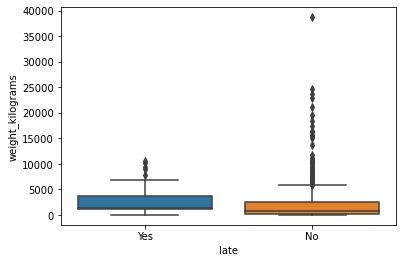

In [155]:
sns.boxplot(x='late', y='weight_kilograms', data=df); #easily see the outlier

In [158]:
df[df['weight_kilograms']>35000]

,id,country,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,...,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
588,5293.0,Guyana,EXW,Air,0.0,No,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",...,100.0,230.0,18400.0,80.0,0.8,ABBVIE GmbH & Co.KG Wiesbaden,38681.0,801.54,reasonable,NaN


When I look deeper to the outlier, it doesn't look like error input, we can do the t-test first with without removing this outlier and consider to remove it later to see if it effects the result. 

### t = ( x̄1 – x̄2) / √ [(s1^2 / n 1 ) + (s2**2 / n 2 )]

In [159]:
xbar = df.groupby('late')['weight_kilograms'].mean()
xbar

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

In [160]:
std = df.groupby('late')['weight_kilograms'].std()
std

late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [161]:
n = df.groupby('late')['weight_kilograms'].count()
n

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [162]:
import numpy as np
from scipy.stats import t, norm
numerator = xbar[0] - xbar[1]
denominator = np.sqrt(std[0]**2/n[0]+std[1]**2/n[1])
t_stat = numerator/denominator
t_stat

-2.3936661778766433

In [163]:
p_val = t.cdf(t_stat, df=n[0]+n[1]-2)
print(p_val)
if p_val <0.05:
    print('reject Ho')
else: 
    print('Cannot reject Ho')

0.008432382146249523
reject Ho


Since our p-value= 0.008 is way smaller than α = 0.05，we will reject Ho, **which means that the weight of the shipments that were on time is less than the weight of the shipments that were late.**

In [164]:
dfnew = df.drop(df[df['weight_kilograms']>35000].index)
dfnew.shape

(999, 24)

In [166]:
dfnew['weight_kilograms'].max()

24556.0

In [167]:
def ttest(xbar, std, n):
    numerator = xbar[0] - xbar[1]
    denominator = np.sqrt(std[0]**2/n[0]+std[1]**2/n[1])
    t_stat = numerator/denominator
    p_val = t.cdf(t_stat, df=n[0]+n[1]-2)
    print(p_val)
    if p_val <0.05:
        print('reject Ho')
    else: 
        print('Cannot reject Ho')

In [168]:
xbarnew = dfnew.groupby('late')['weight_kilograms'].mean()
stdnew = dfnew.groupby('late')['weight_kilograms'].std()
nnew = dfnew.groupby('late')['weight_kilograms'].count()

In [169]:
ttest(xbarnew,stdnew,nnew)

0.005863520426116484
reject Ho


### Is the possibility of late different for different shipment_mode?

In [170]:
# Calculate the proportion of late shipments
df['late'].value_counts(normalize=True)

No     0.939
Yes    0.061
Name: late, dtype: float64

In [173]:
df['late_delivery'].value_counts()

0.0    939
1.0     61
Name: late_delivery, dtype: int64

In [223]:
n = df['shipment_mode'].value_counts()
print(n)

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64


In [224]:
nair = n[0]
print(nair)
nocean = n[1]
print(nocean)

906
88


In [217]:
shmode = df.groupby('shipment_mode')['late_delivery'].mean()
shmode

shipment_mode
Air            0.054084
Air Charter    0.000000
Ocean          0.136364
Name: late_delivery, dtype: float64

In [226]:
pair = shmode[0]
print(pair)
pocean = shmode[2]
print(pocean)

0.05408388520971302
0.13636363636363635


<AxesSubplot:xlabel='shipment_mode', ylabel='late_delivery'>

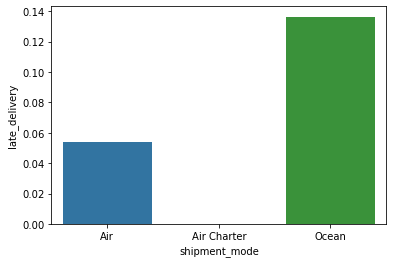

In [206]:
sns.barplot(x='shipment_mode', y='late_delivery', data=shmode)

In [207]:
# ignore Air Charter mode since there is only 6 shipments 0f 1000 and all of them are all ontime shipment
# I want to see if the possibility of delay is affected by shipmode

### 2. If the possibility of delay is affected by shipmode

We choose Two-tailed test

$$H_0: p = p_o$$
$$H_a: p \ne p_o$$

where $p$ and $p_0$ stand for the conversion rate of the new and old design, respectively. We'll also set a **confidence level of 95%**:


In [227]:
p_hat = (pair * nair + pocean * nocean)/ (nair+nocean)
p_hat_times_not_p_hat = p_hat * (1 - p_hat)
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / nair + p_hat_times_not_p_hat / nocean
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

z_score = (pair - pocean) / std_error
p_value = 1 - norm.cdf(z_score)
print(p_value)

0.9989309084105952


Since our  𝑝 -value=0.998 is way above our  𝛼 =0.05, we cannot reject the null hypothesis  𝐻0 , which means that shipment mode air did not perform significantly different ocean
